# Trabalho final de Redes Neurais Artificiais

## Objetivos
O objetivo do trabalho é resolver um problema de **Reconhecimento de Padrões** com base em um conjunto de dados disponiblizados pelo professor, tendo como inspiração a base de dados MNIST. Portanto, o foco é treinar um modelo que seja capaz de reconhecer os digítos manuscritos de 0 a 9 que contém nos conjuntos de treinamento e teste, detectando as imagens digitalizadas dos dígitos.

**trainReduzido.csv** - conjunto de dados de treinamento da rede.

**validacao.csv** - conjunto de dados para testar a rede no final de acordo com a previsão realizada.

Os arquivos de dados trainReduzido.csv e validacao.csv contêm imagens em escala de cinza de dígitos desenhados à mão, de zero a nove.


Cada imagem tem 28 pixels de altura e 28 pixels de largura, para um total de 784 pixels no total. Cada pixel tem um único valor de pixel associado a ele, indicando a claridade ou escuridão desse pixel, com números mais altos significando mais escuro. Este valor de pixel é um número inteiro entre 0 e 255, inclusive.

O conjunto de dados de treinamento, (trainReduzido.csv), tem 785 colunas. A primeira coluna, chamada label, é o dígito que foi desenhado pelo usuário. O restante das colunas contém os valores de pixel da imagem associada.


## Equipe

Antônio Alberto Pereira de Oliveira - 2021086504

Daniel Nogueira Junquei - 2021072244ra

Eduardo Silveira Cezar Ferna - 2021019424ndes




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Dropout

In [3]:
# Carregar o conjunto de dados
train_data = pd.read_csv("C:/Users/danie/OneDrive/Desktop/RNA/rna/TP Final/MNIST Classifier/dados/trainReduzido.csv")
validation_data = pd.read_csv("C:/Users/danie/OneDrive/Desktop/RNA/rna/TP Final/MNIST Classifier/dados/validacao.csv")

# Separar rótulos (y) e features (X) para os dados de treinamento
X_train = train_data.drop("label", axis=1)
y_train = train_data["label"]

# Normalizar os valores dos pixels para o intervalo [0, 1]
X_train = X_train.astype('float32') / 255

# Transformar os rótulos em categorias (one-hot encoding)
y_train = to_categorical(y_train, num_classes=10)

# Dividir em conjuntos de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


## Modelo da Rede Neural
Abaixo contém o modelo da rede neural, criada a partir da biblioteca Keras do TensorFlow.
Utiliza como entrada 785 neurônios, e depois passa por uma camada com 128 neurônios com função de ativação reLU.

Possui uma segunda camada oculta com 64 neurônios, também com função de ativação reLU.

A camada de saída possui 10 neurônios, com função de ativação softmax.
A função softmax transforma as saídas para cada classe para valores entre 0 e 1 e também divide pela soma das saídas.

Durante o treinamento, usa a função de perda de entropia cruzada categórica, adequada para problemas de classificação multiclasse.

In [4]:
# Cria a rede neural
def create_model():
    model = Sequential([
        Flatten(input_shape=(785,)),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Adicionando Dropout para regularização
        Dense(64, activation='relu'),
        Dropout(0.5),  # Mais uma camada de Dropout
        Dense(10, activation='softmax')  # Camada de saída para classificação multiclasse
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Criar e treinar o modelo
model = create_model()
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Avaliar o modelo no conjunto de validação
loss, accuracy_val = model.evaluate(X_val, y_val)
print("*** Resultados da Rede Neural ***")
print("Accuracy: ", accuracy_val)

# Fazer previsões no conjunto de competição
X_competition = validation_data / 255
predictions_competition = np.argmax(model.predict(X_competition), axis=-1)

# Criar dataframe de submissão
submission_df = pd.DataFrame({'ImageId': np.arange(1, len(predictions_competition) + 1), 'Label': predictions_competition})

# Salvar o dataframe de submissão em um novo arquivo CSV
submission_df.to_csv("sample_submission.csv", index=False)

Epoch 1/10
326/326 [==============================] - 2s 4ms/step - loss: 1.2224 - accuracy: 0.7048 - val_loss: 0.1101 - val_accuracy: 0.9685
Epoch 2/10
326/326 [==============================] - 1s 3ms/step - loss: 0.2101 - accuracy: 0.9383 - val_loss: 0.0894 - val_accuracy: 0.9731
Epoch 3/10
326/326 [==============================] - 1s 3ms/step - loss: 0.1420 - accuracy: 0.9594 - val_loss: 0.0693 - val_accuracy: 0.9777
Epoch 4/10
326/326 [==============================] - 1s 3ms/step - loss: 0.1157 - accuracy: 0.9657 - val_loss: 0.0626 - val_accuracy: 0.9804
Epoch 5/10
326/326 [==============================] - 1s 3ms/step - loss: 0.1000 - accuracy: 0.9714 - val_loss: 0.0600 - val_accuracy: 0.9804
Epoch 6/10
326/326 [==============================] - 1s 3ms/step - loss: 0.0948 - accuracy: 0.9720 - val_loss: 0.0570 - val_accuracy: 0.9831
Epoch 7/10
326/326 [==============================] - 1s 3ms/step - loss: 0.0826 - accuracy: 0.9757 - val_loss: 0.0542 - val_accuracy: 0.9839
Epoch 

1/1 [==============================] - 0s 19ms/step


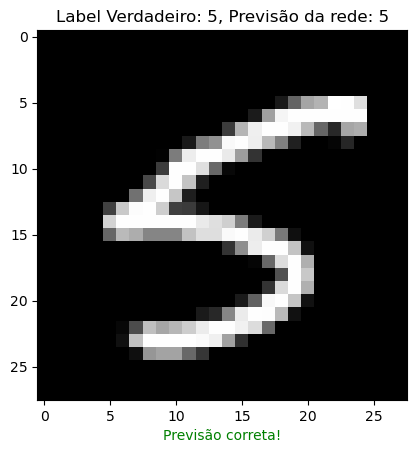

In [6]:

# Escolha aleatória de um índice dos dados de validação
indice = np.random.randint(0, len(X_val))

# Seleciona a imagem e o rótulo correspondente
imagem_com_rotulo = X_val.iloc[indice].to_numpy() # Converte para numpy array
rotulo_verdadeiro = np.argmax(y_val[indice]) # Rótulo verdadeiro do dígito

# Exclui o rótulo para ter apenas a imagem e redimensiona pra 28x28
imagem = imagem_com_rotulo[1:].reshape(28, 28) 

# Previsão do modelo pra essa imagem
previsao = model.predict(X_val.iloc[[indice]])[0]
rotulo_previsto = np.argmax(previsao) # Rótulo previsto pela rede neural

# Plot da imagem do dígito
plt.imshow(imagem, cmap = 'gray')
plt.title(f'Label Verdadeiro: {rotulo_verdadeiro}, Previsão da rede: {rotulo_previsto}')

# Destaca se a previsão foi correta ou não
if rotulo_previsto == rotulo_verdadeiro:
    plt.xlabel('Previsão correta!', color = 'green')

else:
    plt.xlabel('Previsão errada!', color = 'red')

plt.show()